In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
import pandas as pd

**İlk Günlük araç sayısının versi On isleme**

In [ ]:
#İlk Günlük araç sayısının Excel dosyası oku
file_path = "/content/drive/MyDrive/Data Analyts Project/2022-yl-gunluk-arac-saym (1).xlsx"
df = pd.read_excel(file_path)

In [ ]:
#once bakalim
df.head()

,Tarih,Sensor Adi,Sensor No,X Koordinati,Y Koordinati,ARAC TOPLAM
0,2022-01-01,TEM Karanfilköy,2,29.028617,41.092425,89524
1,2022-01-01,TEM Çakmak,4,29.122002,41.007104,169242
2,2022-01-01,TEM Küçükbakkalköy,5,29.106018,40.985743,120990
3,2022-01-01,Optimum AVM,6,29.084167,40.988017,133593
4,2022-01-01,D100 Göztepe,8,29.079106,40.990121,154921


In [ ]:
#Sadece Sensor No 288 olan satirlari filtreleme yap ve gerekli sutunler secmek sonra sonucu goster
filtered_df = df[df["Sensor No"] == 288]
filtered_df = filtered_df[["Tarih", "Sensor No", "Sensor Adi", "ARAC TOPLAM"]]
filtered_df["Tarih"] = pd.to_datetime(filtered_df["Tarih"], dayfirst=True)
filtered_df = filtered_df.sort_values("Tarih", ascending=True)
filtered_df.head()

,Tarih,Sensor No,Sensor Adi,ARAC TOPLAM
113,2022-01-01,288,D100 Edirnekapı,97877
3094,2022-01-02,288,D100 Edirnekapı,89817
5814,2022-01-03,288,D100 Edirnekapı,101108
8239,2022-01-04,288,D100 Edirnekapı,102972
10697,2022-01-05,288,D100 Edirnekapı,105364


Temizlenmis veriyi yeni excel olarak kaydet klasorde

In [ ]:
from google.colab import files

output_path = "/content/drive/MyDrive/Data Analyts Project/sensor_288_temizlenmis.xlsx"
filtered_df.to_excel(output_path, index=False)

output_path

'/content/drive/MyDrive/Data Analyts Project/sensor_288_temizlenmis.xlsx'

**Ikinci veri seti Akaryakit On isleme**

In [ ]:
file_path = "/content/drive/MyDrive/Data Analyts Project/akaryakit-fiyatlari-13.08.2025 03.27.40.xlsx"
df = pd.read_excel(file_path)
df.head()


,Şehir,İlçe,Tarih,V/Max Kurşunsuz 95,V/Pro Diesel,V/Max Diesel,Gazyağı,Kalorifer Yakıtı,%1 Kükürtlü Fuel Oil,PO/gaz Otogaz
0,İstanbul,GAZIOSMANPASA,31.12.2022,19.44 TL/LT,22.02 TL/LT,22.07 TL/LT,21.97 TL/LT,17.76 TL/KG,14.84 TL/KG,- TL/LT
1,İstanbul,GAZIOSMANPASA,30.12.2022,18.60 TL/LT,22.02 TL/LT,22.07 TL/LT,21.97 TL/LT,17.76 TL/KG,14.84 TL/KG,- TL/LT
2,İstanbul,GAZIOSMANPASA,29.12.2022,18.60 TL/LT,22.02 TL/LT,22.07 TL/LT,21.97 TL/LT,17.76 TL/KG,14.84 TL/KG,- TL/LT
3,İstanbul,GAZIOSMANPASA,28.12.2022,18.60 TL/LT,22.02 TL/LT,22.07 TL/LT,21.97 TL/LT,17.76 TL/KG,14.84 TL/KG,- TL/LT
4,İstanbul,GAZIOSMANPASA,27.12.2022,18.60 TL/LT,22.02 TL/LT,22.07 TL/LT,21.97 TL/LT,17.76 TL/KG,14.84 TL/KG,- TL/LT


In [ ]:
filtered_df = df[["Tarih", "V/Max Kurşunsuz 95"]]
filtered_df["Tarih"] = pd.to_datetime(filtered_df["Tarih"], dayfirst=True)
filtered_df = filtered_df.sort_values("Tarih", ascending=True)
filtered_df.head()



/tmp/ipython-input-468245405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Tarih"] = pd.to_datetime(filtered_df["Tarih"], dayfirst=True)


,Tarih,V/Max Kurşunsuz 95
364,2022-01-01,12.91 TL/LT
363,2022-01-02,12.91 TL/LT
362,2022-01-03,12.91 TL/LT
361,2022-01-04,12.91 TL/LT
360,2022-01-05,12.91 TL/LT


In [ ]:
from google.colab import files

output_path = "/content/drive/MyDrive/Data Analyts Project/Akaryakit_temizlenmis1.xlsx"
filtered_df.to_excel(output_path, index=False)

output_path

'/content/drive/MyDrive/Data Analyts Project/Akaryakit_temizlenmis1.xlsx'

**Tarih üzerinden iki veriyi birleştirmek ve Akayakıt fiyat ve Araç Linear regression**


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
# veriler yukle
file_path = "/content/drive/MyDrive/Data Analyts Project/sensor_288_temizlenmis.xlsx"
trafik_df = pd.read_excel(file_path)
file_path ="/content/drive/MyDrive/Data Analyts Project/Akaryakit_temizlenmis1.xlsx"
yakit_df = pd.read_excel(file_path)

In [ ]:
# Tarih sutunleri datetime formatina cevir cunku 2 dosyada tarihler farkli tipi oldugu icin
trafik_df["Tarih"] = pd.to_datetime(trafik_df["Tarih"])
yakit_df["Tarih"] = pd.to_datetime(yakit_df["Tarih"])
# birleştirme yap
df = pd.merge(trafik_df, yakit_df, on="Tarih")


In [ ]:
# V/Max Kurşunsuz 95 sadece sayısal al
df["V/Max Kurşunsuz 95"] = df["V/Max Kurşunsuz 95"].astype(str).str.replace(" TL/LT", "")
df["V/Max Kurşunsuz 95"] = df["V/Max Kurşunsuz 95"].astype(float)

# Extract features (X) and target (y) after cleaning
X = df[["V/Max Kurşunsuz 95"]]
y = df["ARAC TOPLAM"]

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
y_pred = model.predict(X)

In [ ]:
print("Eğim (slope):", model.coef_[0])
print("Y-kesişim (intercept):", model.intercept_)
print("R-kare (R²) değeri:", model.score(X, y))

Eğim (slope): 590.5587047636717
Y-kesişim (intercept): 86875.78882065482
R-kare (R²) değeri: 0.05038035245828487


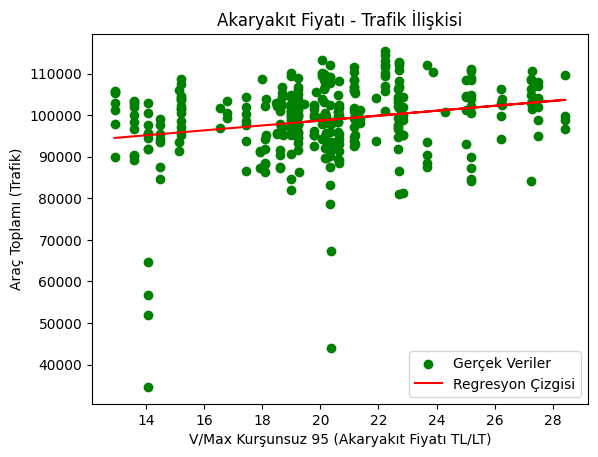

In [ ]:
plt.scatter(X, y, color="green", label="Gerçek Veriler")
plt.plot(X, y_pred, color="red", label="Regresyon Çizgisi")
plt.xlabel("V/Max Kurşunsuz 95 (Akaryakıt Fiyatı TL/LT)")
plt.ylabel("Araç Toplamı (Trafik)")
plt.title("Akaryakıt Fiyatı - Trafik İlişkisi")
plt.legend()
plt.show()